> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDB Movie ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

# Dataset Description 
Dataset: This movie dataset contains information about 10,000 movies including genres, ratings, revenue, budget, and more. It contains movies which are released between 1960 and 2015
### Question(s) for Analysis
### 1-What is the number of movies released every year?
### 2-What is the most popular keywords?
### 3-How are the budget of making a movie changed over time?
### 4-Is there any relationship between columns?
### 5-Which director has the most popular movies?
### 6- What is the number of movies for each genre?
### 7-Which production companies have most movies?
### 8-Which movies have the most and least profit?



In [34]:
pip install wordcloud

In [74]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<a id='wrangling'></a>
## Data Wrangling
load the data, check for cleanliness, and then trim and clean the dataset for analysis.




### General Properties


In [75]:

#loading the data
dfa = pd.read_csv("tmdb-movies.csv")
dfa.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [76]:
dfa.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [77]:
dfa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [78]:
#checking duplicated rows
dfa.duplicated().sum()

1

In [79]:
#checking null values
dfa.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# First thoughts
### 1- Some columns aren't needed in the analysis which i will drop (revenue, cast, imdb_id, budget, homepage, tagline, overview, vote_count, vote_average, runtime)
### 2- number of votes differ for each movie , so vote_count and vote_average might not be useful.
### 3- some rows have null values  i will drop.
### 4- some rows has 0 budget and revanue which i think is a missing data so i will drop them too.
### 5- there is only 1 duplicate row  i will drop.


### Data Cleaning


In [80]:
#i would drop un important columns that i wouldnt use
dfa.drop(labels =['revenue', 'cast','imdb_id','budget', 'homepage', 'tagline', 'overview','vote_count', 'vote_average','runtime'], axis=1, inplace=True)
dfa.shape

(10866, 11)

In [81]:
# drop duplicated rows

dfa.drop_duplicates(inplace=True)
dfa.duplicated().sum()

0

In [82]:

#changing rows with zeros
dfa['budget_adj'] = dfa['budget_adj'].replace(0, np.NaN)
dfa['revenue_adj'] = dfa['revenue_adj'].replace(0, np.NaN)
#dropping null values
dfa.dropna(inplace=True)
dfa.isna().sum()

id                      0
popularity              0
original_title          0
director                0
keywords                0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [83]:
#changing the format into DateTime
dfa['release_date'] = pd.to_datetime(dfa['release_date'])
dfa['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis


### Question:1-What is the number of movies released every year?

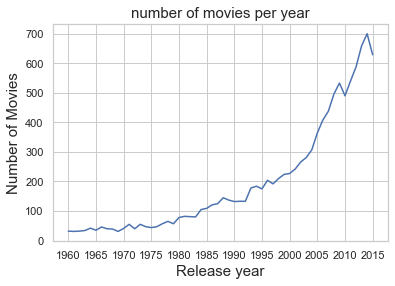

In [84]:
#group data by 'release year' and 'id' count
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(20,10)})
#x label
plt.xlabel('Release year',fontsize = 15)
#y label
plt.ylabel('Number of Movies',fontsize = 15)
#plot label
plt.title("number of movies per year",fontsize = 15)
sns.set_style("whitegrid")

### number of movies is increasing every year, dropped after 2011¶


### Question:2-What is the most popular keywords?


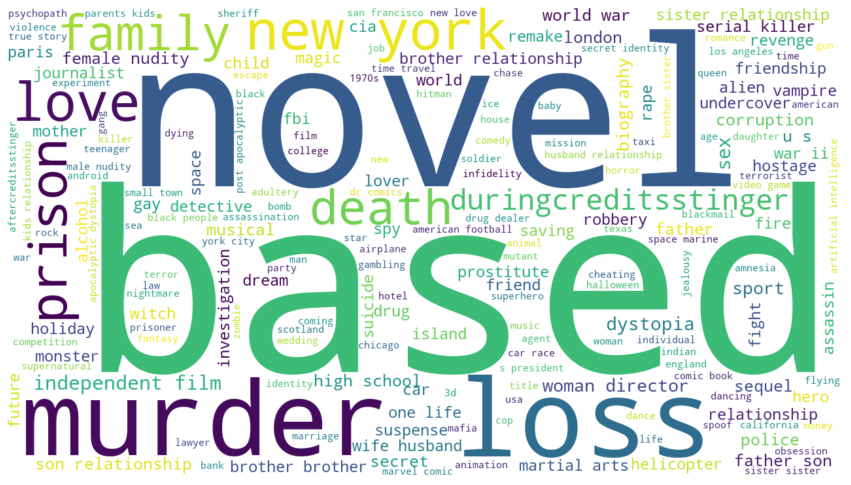

In [85]:
#using wordcloud
text = dfa.keywords.str.cat(sep='|')
plt.figure( figsize=(15,10))
wordcloud = WordCloud(width=1280, height=720,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Question:3-How are the budget of making a movie changed over time?

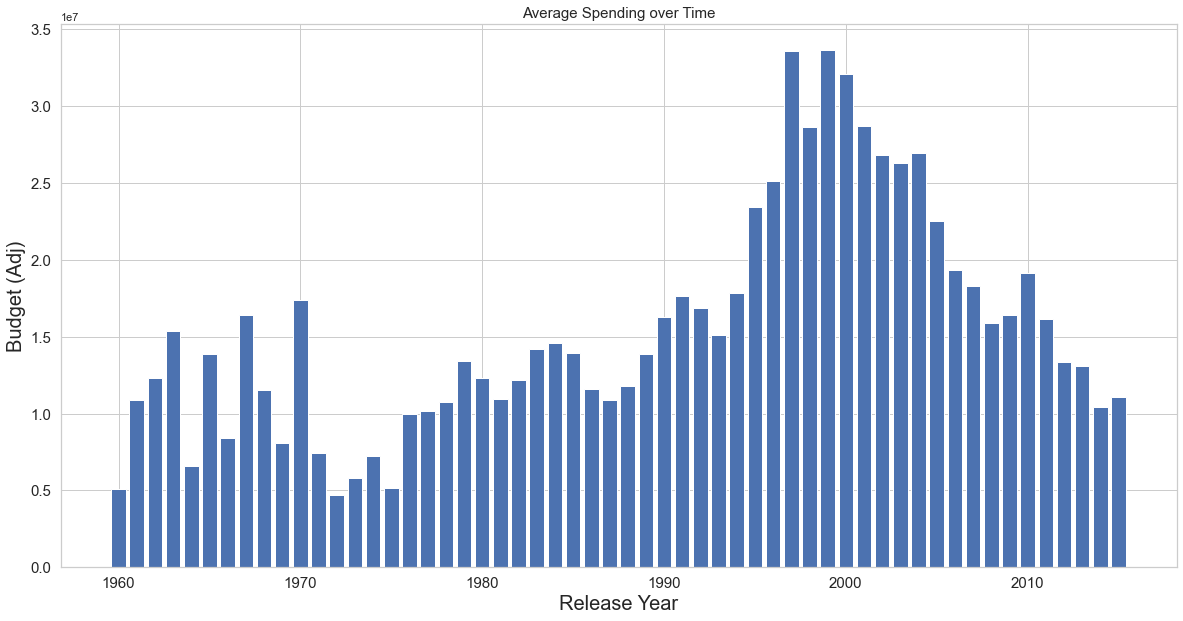

In [87]:
#defining axes
x=df.groupby('release_year').budget_adj.mean().index
y=df.groupby('release_year').budget_adj.mean().values
#size of plot
plt.figure(figsize=(20,10))
plt.bar(x,y);
#x axis label
plt.xlabel('Release Year',size=20)
plt.xticks(size=15)
#y axis label
plt.ylabel('Budget (Adj)',size=20)
plt.yticks(size=15)
#plot label
plt.title('Average Spending over Time',size=15);
sns.set_style("whitegrid")

### This plot shows ups and downs many time, we can notice that most spending was in period between 2000 and 2010


### Question:4-Is there any relationship between columns?

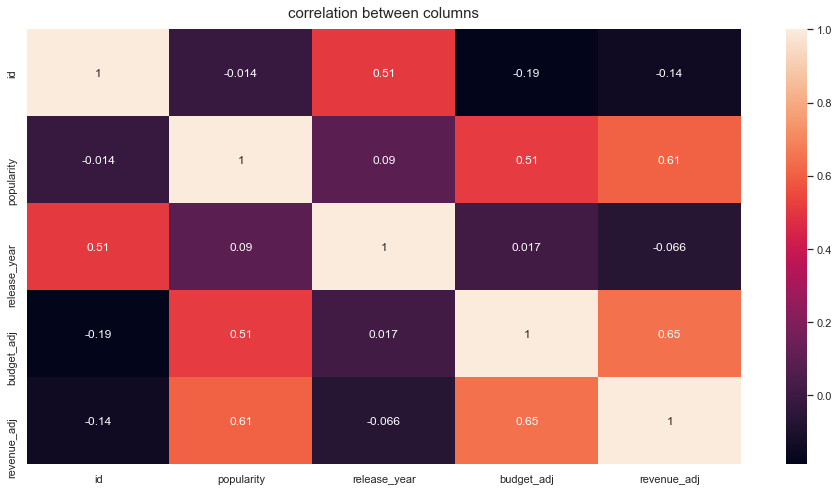

In [89]:
#correlation heatmap to find relation between columns
corr = df.corr()
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(corr,annot=True)
heatmap.set_title('correlation between columns', fontdict={'fontsize':15}, pad=12);

I will mention just high correlated relationship between columns
 Popularity vs Profit:
 It is obvious that we find a relation between them, movies with high popularity has high profit Correlation = 0.51

 Popularity vs Revenue:
 It is obvious that we find a relation between them, movies with high popularity has high revenue Correlation = 0.54

 Revenue vs Profit:
 It is obvious that we find a relation between them, movies with high revenue has high profit Correlation = 0.98

 Budget vs Revenue:
 we can find that there is a acceptable relationship between budget and revenue, movies with higher budget get higher revenue

 Correlation = 0.57

 Popularity vs Revenue:
 we can find that there is a acceptable relationship between budget and revenue, movies with higher popularity get higher revenue

 Correlation = 0.54

### Question:5-Which director has the most popular movies?


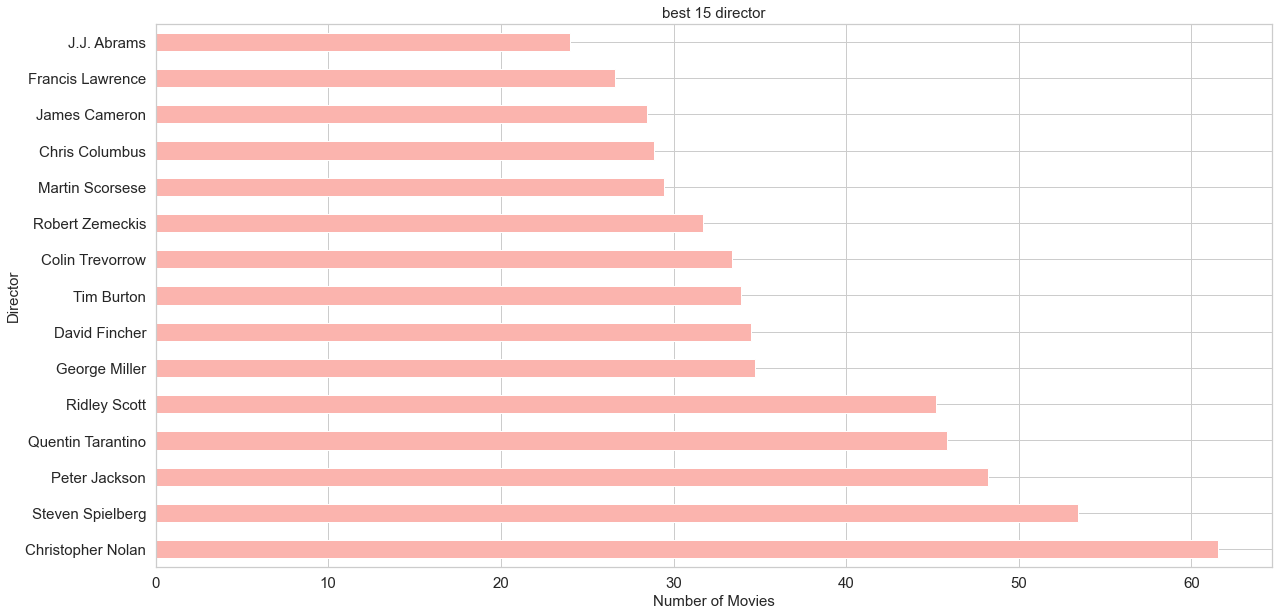

In [91]:
#group rows by directior and popularity column
director = dfa.groupby('director').popularity.sum().sort_values(ascending=False)[:15]
#plot with kind 'barh'
director.plot(kind= 'barh',figsize = (20,10),fontsize=15,colormap='Pastel1')

#plot label
plt.title("best 15 director",fontsize=15)
#x axis label
plt.xlabel('Number of Movies',fontsize=15)
#y axis label
plt.ylabel("Director",fontsize= 15)
sns.set_style("whitegrid")

### Christopher Nolan has the most number of movies


### Question:6- What is the number of movies for each genre?


In [93]:
#function for spliting values
def split_values(x):
    #link all the rows of the genres.
    link_rows = dfa[x].str.cat(sep = '|')
    #split all values
    data = pd.Series(link_rows.split('|'))
    #return each genre and it's count.
    return data.value_counts(ascending=False)

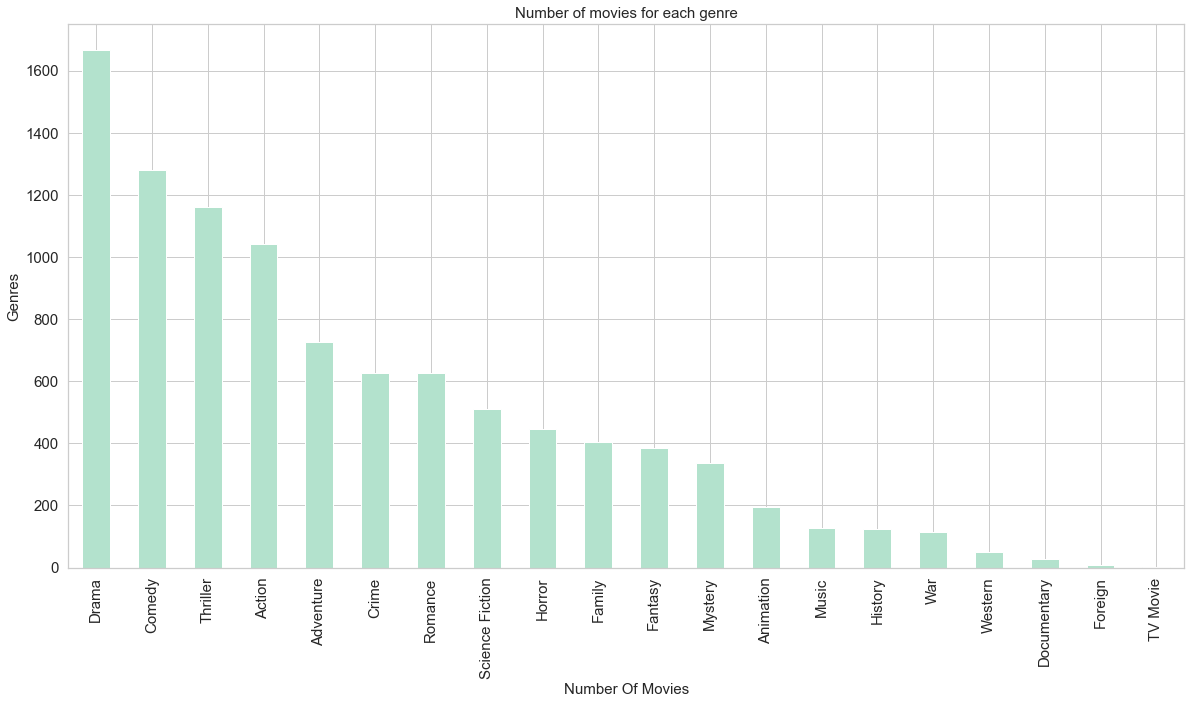

In [94]:
#call the function we called
genres = split_values('genres')

#plot with kind 'bar'
genres.plot(kind= 'bar',figsize = (20,10),fontsize=15,colormap='Pastel2')
#plot label
plt.title("Number of movies for each genre",fontsize=15)
#x axis label
plt.xlabel('Number Of Movies',fontsize=15)
#y axis label
plt.ylabel("Genres",fontsize= 15)
sns.set_style("whitegrid")

### we notice that Drama is the most genre while TV movie is the least.


### Question:7-Which production companies have most movies?


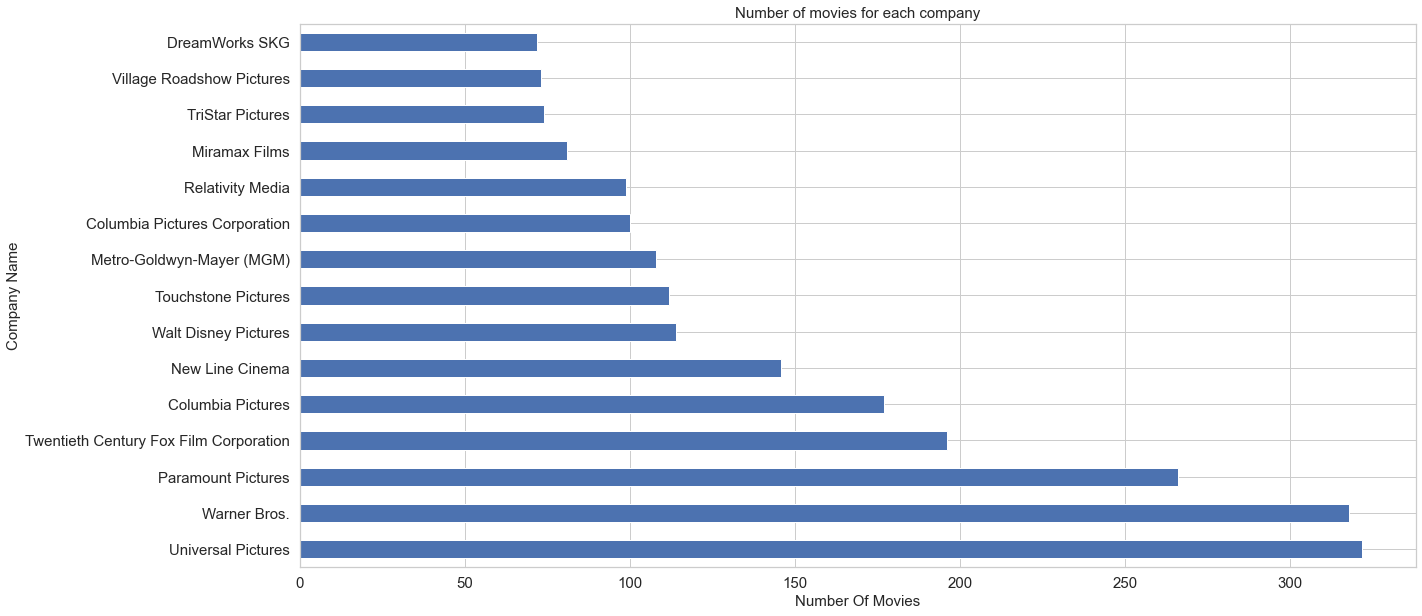

In [96]:

#call the function we created beore to split rows and return there counts
production_companies = split_values('production_companies')

#select first 15 value
production_companies.iloc[:15].plot(kind='barh',figsize=(20,10),fontsize=15)
#plot label
plt.title("Number of movies for each company",fontsize=15)
#x axis label
plt.xlabel('Number Of Movies',fontsize=15)
#y axis label
plt.ylabel('Company Name',fontsize=15)
sns.set_style("whitegrid")

### From the plot above we notice that (Universal Pictures, Warner Bros) have the most number of movies


### Question: 8-Which movies have the most and least profit?


In [98]:
#making new column for profit
dfa['profit'] = dfa['revenue_adj'] - dfa['budget_adj']
#finding movies with highest and lowest profit 
most =  pd.DataFrame(dfa.loc[dfa['profit'].idxmax()])
least = pd.DataFrame(dfa.loc[dfa['profit'].idxmin()])
df_profit = pd.concat([most, least],axis=1)
df_profit

,1329,2244
id,11,46528
popularity,12.0379,0.25054
original_title,Star Wars,The Warrior's Way
director,George Lucas,Sngmoo Lee
keywords,android|galaxy|hermit|death star|lightsaber,assassin|small town|revenge|deception|super speed
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
release_year,1977,2010
budget_adj,3.95756e+07,4.25e+08


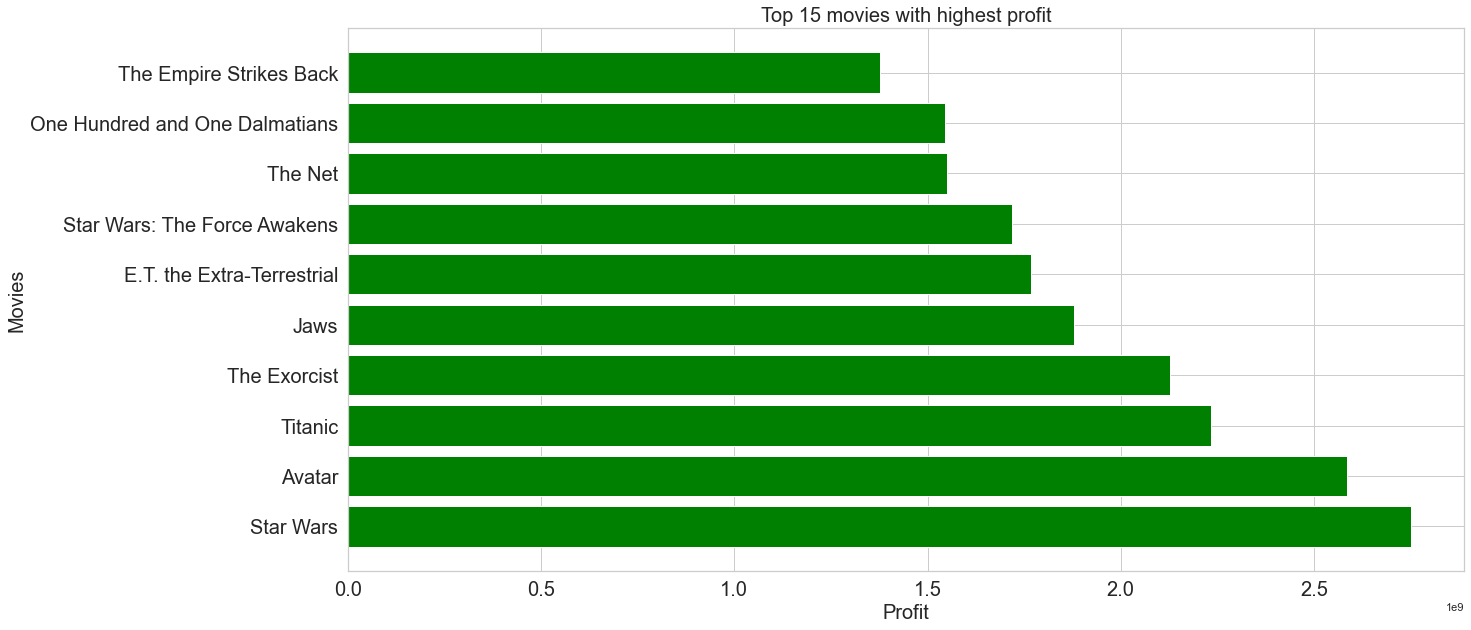

In [99]:

# creating the dataset
df_mp = pd.DataFrame(dfa['profit'].sort_values(ascending = False))
df_mp['original_title'] = dfa['original_title'].copy()

#defining axes
movies = df_mp['original_title'][:10]
profit = df_mp['profit'][:10]

#size of plot  
fig = plt.figure(figsize = (20, 10))

# creating the barh plot
plt.barh(movies, profit, color ='green')

#x axis label
plt.xlabel("Profit",size=20)
plt.xticks(size=20)

#y axis label
plt.ylabel("Movies",size=20)
plt.yticks(size=20)

#plot label
plt.title("Top 15 movies with highest profit",size = 20)
sns.set_style("whitegrid")

### from this plot we got most 15 movie with highest profit



# Conclusions
#### We can summarize our findings in those few points:
#### Budget of making movies is increasing over time.
#### Star Wars is the most profitable movie ever, The Warrior's Way is the least
#### there are many relations in this dataset:
#### 1 Popularity vs Profit
####  2 Popularity vs Revenue
#### 3  Revenue vs Profit
#### 4 Budget vs Revenue
#### 5 Popularity vs Revenue
#### Number of movies is increasing every year,but dropped after 2011.
#### Drama is the most genre while TV movie is the least.
#### Most Earning Film Production Companies are:
#### 1 Universal Picture
#### 2  Warner Bros
#### 3 Paramount Pictures
#### 4 20th Century Studios
#### Directors with the most popular movies:
#### 1 Christopher Nolan
#### 2 Steven Spielberg
#### 3  Peter Jackson
#### 4 Quentin Tarantino
# Limitation:
#### many data that was removed such as rows contained becuase they have null values or zero which refer to null too.
#### It should be noted that these analysis does not imply any causation.

In [100]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1